In [1]:
import pandas as pd
import numpy as np

# Prepare Data

In [2]:
# Load data
# access to data: https://data.europa.eu/data/datasets/418d5d6f-04c6-4a45-84da-b85d21c9d47c?locale=en
path = 'data/'
df_2018 = pd.read_csv(f'{path}/data_2018.csv', encoding='iso-8859-1', delimiter=";")
df_2019 = pd.read_csv(f'{path}/data_2019.csv', encoding='iso-8859-1', delimiter=";")
df_2020 = pd.read_csv(f'{path}/data_2020.csv', encoding='iso-8859-1', delimiter=";")
df_2021 = pd.read_csv(f'{path}/data_2021.csv', encoding='iso-8859-1', delimiter=";")

In [3]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50119 entries, 0 to 11266
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     50119 non-null  int64  
 1   LAND         50119 non-null  int64  
 2   BEZ          50119 non-null  int64  
 3   LOR          38848 non-null  float64
 4   STRASSE      27042 non-null  object 
 5   LOR_ab_2021  36724 non-null  float64
 6   UJAHR        50119 non-null  int64  
 7   UMONAT       50119 non-null  int64  
 8   USTUNDE      50119 non-null  int64  
 9   UWOCHENTAG   50119 non-null  int64  
 10  UKATEGORIE   50119 non-null  int64  
 11  UART         50119 non-null  int64  
 12  UTYP1        50119 non-null  int64  
 13  ULICHTVERH   50119 non-null  int64  
 14  IstRad       50119 non-null  int64  
 15  IstPKW       50119 non-null  int64  
 16  IstFuss      50119 non-null  int64  
 17  IstKrad      50119 non-null  int64  
 18  IstGkfz      50119 non-null  int64  
 19  IstSonsti

In the data sets between the years 2018 and 2021 there was a change in the naming of the variable for the street condition (from USTRZUSTAND to STRZUSTAND) but we want to merge them to one. And we want to remove some irrelevant columns.

In [5]:
df.USTRZUSTAND = df.USTRZUSTAND.combine_first(df.STRZUSTAND)
rm_columns = ['OBJECTID', 'LAND', 'LOR', 'STRASSE', 'LOR_ab_2021', 'IstSonstig', 'IstSonstige', 'STRZUSTAND', 'XGCSWGS84', 'YGCSWGS84', 'LINREFX', 'LINREFY']
df = df.drop(rm_columns, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50119 entries, 0 to 11266
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BEZ          50119 non-null  int64 
 1   UJAHR        50119 non-null  int64 
 2   UMONAT       50119 non-null  int64 
 3   USTUNDE      50119 non-null  int64 
 4   UWOCHENTAG   50119 non-null  int64 
 5   UKATEGORIE   50119 non-null  int64 
 6   UART         50119 non-null  int64 
 7   UTYP1        50119 non-null  int64 
 8   ULICHTVERH   50119 non-null  int64 
 9   IstRad       50119 non-null  int64 
 10  IstPKW       50119 non-null  int64 
 11  IstFuss      50119 non-null  int64 
 12  IstKrad      50119 non-null  int64 
 13  IstGkfz      50119 non-null  int64 
 14  USTRZUSTAND  50119 non-null  object
dtypes: int64(14), object(1)
memory usage: 6.1+ MB


The street condition variable (USTRZUSTAND) has some non-numeric value in it. We transform to numeric and drop any NANs.

In [7]:
# change dtype to numeric
# --> error shows that there is a string at position 11893, wrong entry, remove
# replace index where error occurs (with empty entry by ignoring error case)
df.USTRZUSTAND = pd.to_numeric(df.USTRZUSTAND, errors='coerce')
# drop nan row
df = df.dropna(axis=0)

Rename variables and entries according to the description in meta data pdf.

In [10]:
# rename columns
df = df.rename(columns={'BEZ': 'district',
                        'UJAHR': 'year',
                        'STRASSE': 'street',
                        'UMONAT': 'month',
                        'USTUNDE': 'hour',
                        'UWOCHENTAG': 'day',
                        'UKATEGORIE': 'severe_accident',
                        'UART': 'type_1',
                        'UTYP1': 'type_2',
                        'ULICHTVERH': 'light_condition',
                        'IstRad': 'bike_involved',
                        'IstPKW': 'car_involved',
                        'IstFuss': 'pedestrian_involved',
                        'IstKrad': 'motorbike_involved',
                        'IstGkfz': 'truck_involved',
                        'USTRZUSTAND': 'street_condition'
                        })

In [11]:
# rename categorical entries according to meta data
districts = {
    1: 'mitte',
    2: 'friedrichshain_kreuzberg',
    3: 'pankow',
    4: 'charlottenburg_wilmersdorf',
    5: 'spandau',
    6: 'steglitz_zehlendorf',
    7: 'tempelhof_schoeneberg',
    8: 'neukoelln',
    9: 'treptow_koepenick',
    10: 'marzahn_hellersdorf',
    11: 'lichtenberg',
    12: 'reinickendorf'
}
df.district = df.district.map(districts)

months = {
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'aug',
    9: 'sep',
    10: 'okt',
    11: 'nov',
    12: 'dec',
}
df.month = df.month.map(months)

df.hour = df.hour.map(str)

days = {
    1: 'sun',
    2: 'mon',
    3: 'tue',
    4: 'wed',
    5: 'thu',
    6: 'fri',
    7: 'sat'
}
df.day = df.day.map(days)

severities = {
    1: 'yes',
    2: 'yes',
    3: 'no'
}
df.severe_accident = df.severe_accident.map(severities)

types_1 = {
    1: 'crash_stationary_vehicle',
    2: 'crash_ahead_vehicle',
    3: 'crash_lateral_vehicle',
    4: 'crash_oncoming_vehicle',
    5: 'crash_turning_vehicle',
    6: 'crash_vehicle_pedestrian',
    7: 'crash_obstacle',
    8: 'leaving_lane_right',
    9: 'leaving_lane_left',
    0: 'other'
}
df.type_1 = df.type_1.map(types_1)

types_2 = {
    1: 'driving',
    2: 'turning',
    3: 'crossing',
    4: 'exceeding',
    5: 'stationary_taffic',
    6: 'parallel_traffic',
    7: 'other'
}
df.type_2 = df.type_2.map(types_2)

light_conds = {
    0: 'daylight',
    1: 'dawn_or_dusk',
    2: 'dark'
}
df.light_condition = df.light_condition.map(light_conds)

binary_categories = {
    0: 'no',
    1: 'yes'
}
df.bike_involved = df.bike_involved.map(binary_categories)
df.car_involved = df.car_involved.map(binary_categories)
df.pedestrian_involved = df.pedestrian_involved.map(binary_categories)
df.motorbike_involved = df.motorbike_involved.map(binary_categories)
df.truck_involved = df.truck_involved.map(binary_categories)

street_conds = {
    0: 'dry',
    1: 'wet',
    2: 'snow_or_ice',
    0.0: 'dry',
    1.0: 'wet',
    2.0: 'snow_or_ice',
}
df.street_condition = df.street_condition.map(street_conds)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50118 entries, 0 to 11266
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   district             50118 non-null  object
 1   year                 50118 non-null  int64 
 2   month                50118 non-null  object
 3   hour                 50118 non-null  object
 4   day                  50118 non-null  object
 5   severe_accident      50118 non-null  object
 6   type_1               50118 non-null  object
 7   type_2               50118 non-null  object
 8   light_condition      50118 non-null  object
 9   bike_involved        50118 non-null  object
 10  car_involved         50118 non-null  object
 11  pedestrian_involved  50118 non-null  object
 12  motorbike_involved   50118 non-null  object
 13  truck_involved       50118 non-null  object
 14  street_condition     50118 non-null  object
dtypes: int64(1), object(14)
memory usage: 6.1+ MB


# Prepare Validation Framework
Split data into training and test data sets. Split test data into training and validation sets for iterative evaluation during parameter tuning.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# 80% full train, 20% test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
# split full train into train and validation: x = 0.8/0.2 = 0.25
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
print(len(df), len(df_train), len(df_val), len(df_test))

50118 30070 10024 10024


In [16]:
# reset randomized index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
# change y to numerical for training
df_train.severe_accident.replace(['yes', 'no'], [1, 0], inplace=True)
df_val.severe_accident.replace(['yes', 'no'], [1, 0], inplace=True)
df_test.severe_accident.replace(['yes', 'no'], [1, 0], inplace=True)

In [18]:
# assign y data to be predicted
y_train = df_train.severe_accident.values
y_val = df_val.severe_accident.values
y_test = df_test.severe_accident.values

In [19]:
# remove y from data
del df_train['severe_accident']
del df_val['severe_accident']
del df_test['severe_accident']

# Exploratory data analysis

In [20]:
from matplotlib import pyplot as plt

Inspect indications of predictors for severe accidents by plotting the distribution across variables of interest:

C:\Users\nnu04\AppData\Local\Temp\ipykernel_2560\3911979226.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2, 0].set_xticklabels(vehicles, rotation=90)
C:\Users\nnu04\AppData\Local\Temp\ipykernel_2560\3911979226.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2, 1].set_xticklabels(districts, rotation=90)


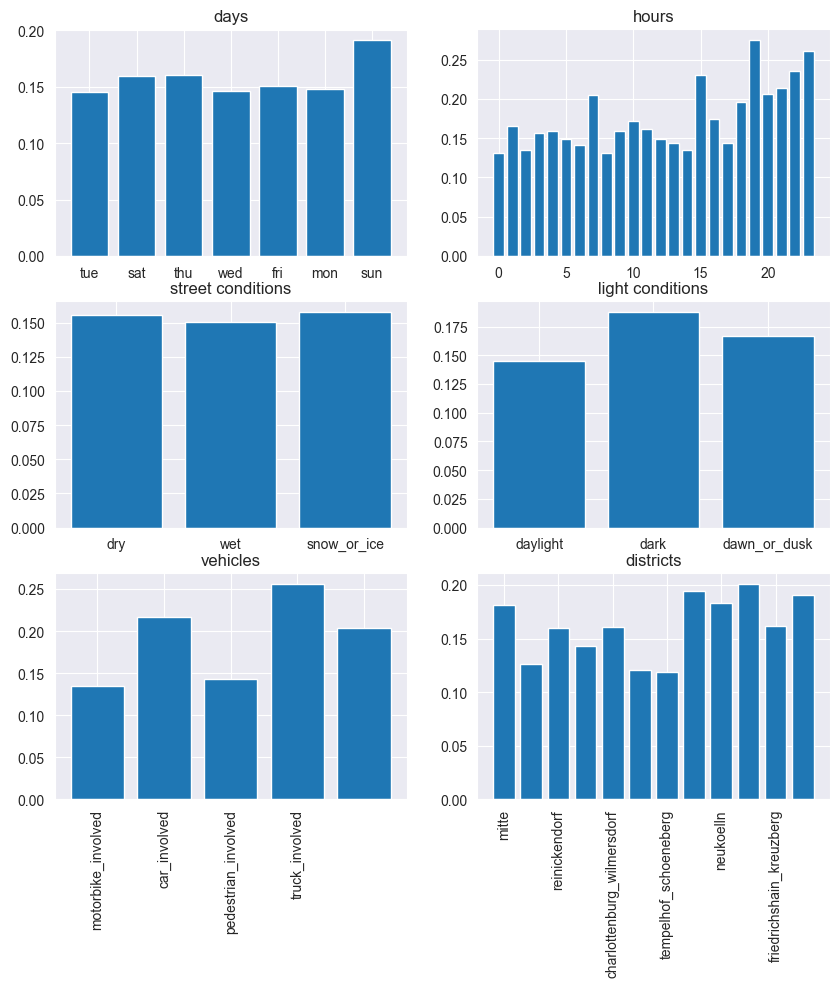

In [21]:
# inspect rate percentage of severe accidents (sa) by vehicle, district, day, hour, street condition, light condition

fig, ax = plt.subplots(3,2)

# day
days = df_train['day'].unique()
days_sa = []
[days_sa.append(y_train[df_train['day']==day].mean()) for day in days]

ax[0, 0].bar(range(len(days)), days_sa, tick_label=days)
ax[0, 0].set_title('days')

# hour
hours = df.hour.unique()
hour_sa = []
[hour_sa.append(y_train[df_train['hour']==h].mean()) for h in hours]

hours = sorted([int(h) for h in hours])
ax[0, 1].bar(range(max(hours)+1), hour_sa)
ax[0, 1].set_title('hours')

# street condition
conditions = df_train['street_condition'].unique()
conditions_sa = []
[conditions_sa.append(y_train[df_train['street_condition']==condition].mean()) for condition in conditions]

ax[1, 0].bar(range(len(conditions)), conditions_sa, tick_label=conditions)
ax[1, 0].set_title('street conditions')

# light condition
light_conds = df_train['light_condition'].unique()
light_conds_sa = []
[light_conds_sa.append(y_train[df_train['light_condition']==cond].mean()) for cond in light_conds]

ax[1, 1].bar(range(len(light_conds)), light_conds_sa, tick_label=light_conds)
ax[1, 1].set_title('light conditions')

# vehicle
vehicles = ['bike_involved', 'motorbike_involved', 'car_involved', 'pedestrian_involved', 'truck_involved']
vehicles_sa = []
[vehicles_sa.append(y_train[df_train[vehicle]=='yes'].mean()) for vehicle in vehicles]

ax[2, 0].bar(range(len(vehicles)), vehicles_sa)
ax[2, 0].set_xticklabels(vehicles, rotation=90)
ax[2, 0].set_title('vehicles')

# district
districts = df_train['district'].unique()
districts_sa = []
[districts_sa.append(y_train[df_train['district']==district].mean()) for district in districts]

ax[2, 1].bar(range(len(districts)), districts_sa)
ax[2, 1].set_xticklabels(districts, rotation=90)
ax[2, 1].set_title('districts')

fig.set_figheight(10)
fig.set_figwidth(10)
# fig.tight_layout()

We can see that the evening hours, darkness, the sunday and the involvement of a truck are associated with severe accidents. Most of these predictors would be expected, which can serve as a good indication that the data reflects an existing trend.

Inspect trend across the four years of the data acquisition

C:\Users\nnu04\AppData\Local\Temp\ipykernel_2560\1418298442.py:14: RuntimeWarning: Mean of empty slice.
  [months_sa.append(y_train[df_train['month']==month].mean()) for month in months]
C:\Users\nnu04\.conda\envs\projects\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\nnu04\AppData\Local\Temp\ipykernel_2560\1418298442.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(months, rotation=90)
C:\Users\nnu04\AppData\Local\Temp\ipykernel_2560\1418298442.py:27: RuntimeWarning: Mean of empty slice.
  months_sa.append(y_train[(df_train['year']==year) & (df_train['month']==month)].mean())


Text(0.5, 1.0, 'months across years')

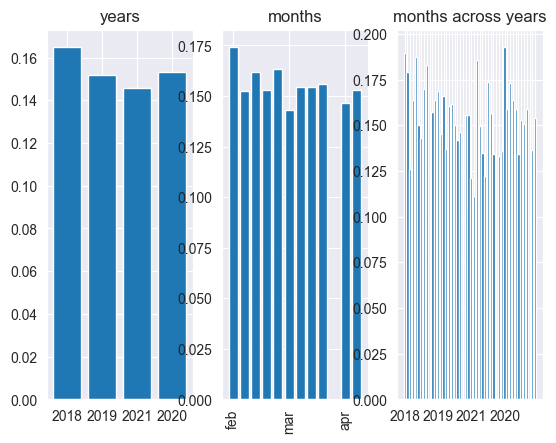

In [22]:
fig, ax = plt.subplots(1,3)

# years
years = df_train['year'].unique()
years_sa = []
[years_sa.append(y_train[df_train['year']==year].mean()) for year in years]

ax[0].bar(range(len(years)), years_sa, tick_label=years)
ax[0].set_title('years')

# months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
months_sa = []
[months_sa.append(y_train[df_train['month']==month].mean()) for month in months]

ax[1].bar(range(len(months)), months_sa)
ax[1].set_xticklabels(months, rotation=90)
ax[1].set_title('months')

# all month over years
months_sa = []
year_labels = []
count = 0
for year in years:
    count += 1
    for month in months:
        months_sa.append(y_train[(df_train['year']==year) & (df_train['month']==month)].mean())
        if month == 'jan':
            year_labels.append(str(year))
        else:
            year_labels.append('')

ax[2].bar(range(len(year_labels)), months_sa, tick_label=year_labels)
#ax[2].plot(range(len(year_labels)), months_sa)
ax[2].set_title('months across years')

We potentially observe a downward trend in the severity of accidents over the years which might, however, rather show a repeating decrease over months.

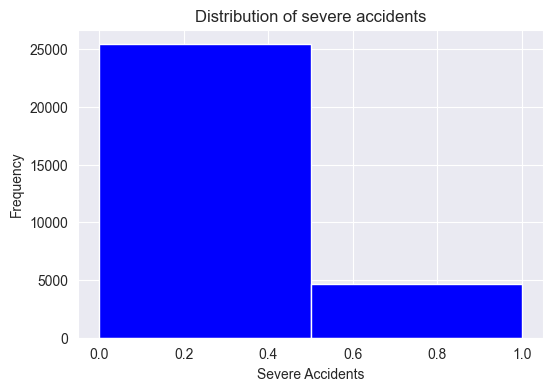

In [23]:
import seaborn as sns
# distribution of "severe_accidents" for training data
plt.figure(figsize=(6, 4))

sns.histplot(y_train, bins=2, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Severe Accidents')
plt.title('Distribution of severe accidents')

plt.show()

In [24]:
# use dict vectorizer for one-hot encoding of data
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [25]:
# get all features as dict
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
# parse to dv to create binary matrix for training data
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [27]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
decision = (y_pred >= 0.5)

In [29]:
# evaluate model
print((y_val == decision).mean())
print(f'ROC AUC: {roc_auc_score(y_val, decision)}')

0.8437749401436552
ROC AUC: 0.5011267308065013


th: 0.00, acc: 0.156
th: 0.04, acc: 0.173
th: 0.08, acc: 0.319
th: 0.12, acc: 0.508
th: 0.17, acc: 0.675
th: 0.21, acc: 0.753
th: 0.25, acc: 0.795
th: 0.29, acc: 0.822
th: 0.33, acc: 0.834
th: 0.38, acc: 0.842
th: 0.42, acc: 0.843
th: 0.46, acc: 0.844
th: 0.50, acc: 0.844
th: 0.54, acc: 0.844
th: 0.58, acc: 0.844
th: 0.62, acc: 0.844
th: 0.67, acc: 0.844
th: 0.71, acc: 0.844
th: 0.75, acc: 0.844
th: 0.79, acc: 0.844
th: 0.83, acc: 0.844
th: 0.88, acc: 0.844
th: 0.92, acc: 0.844
th: 0.96, acc: 0.844
th: 1.00, acc: 0.844


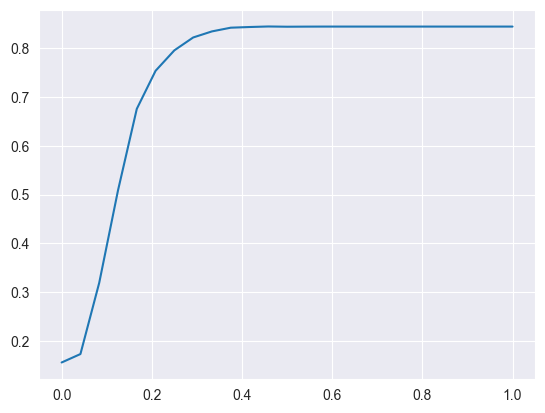

In [30]:
# check accuracy for different thresholds
thresholds = np.linspace(0, 1, 25)
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('th: %.2f, acc: %.3f' % (t, score))
    scores.append(score)

plt.plot(thresholds, scores)

In [33]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

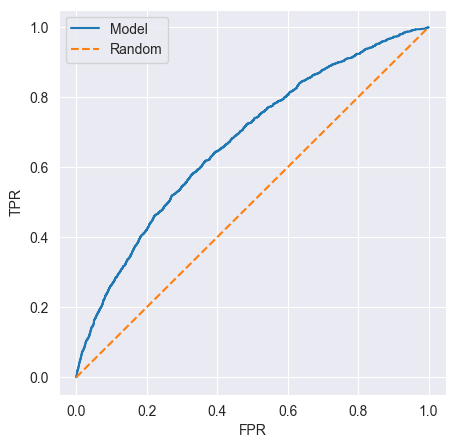

In [35]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [38]:
y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.5367496252989612

In [39]:
# inspect parameters: different tree depths
print('depth   roc-auc')
for depth in range(1, 11, 1):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)

    y_pred = tree.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f'{depth}     {auc}')

depth   roc-auc
1     0.5496871990207904
2     0.5962705856829987
3     0.6214210956098823
4     0.6355167433763117
5     0.6407683048102305
6     0.6463776857922425
7     0.6493926481996392
8     0.6470761976425197
9     0.6459213751280479
10     0.643069480737444


In [43]:
# depths 6 - 9 seem to be best
# inspect parameters: different min samples leafs
scores = []
for depth in [6, 7, 8, 9]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200, 300, 400, 500, 600, 700, 1000]:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=1)
        tree.fit(X_train, y_train)

        y_pred = tree.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

                      auc                           
max_depth               6        7        8        9
min_samples_leaf                                    
1                 0.64638  0.64939  0.64708  0.64592
5                 0.64871  0.65075  0.64863  0.65124
10                0.64675  0.64790  0.64730  0.64704
15                0.64913  0.64994  0.65209  0.65218
20                0.65078  0.65018  0.65411  0.65181
50                0.65333  0.65890  0.65992  0.66230
100               0.65352  0.66084  0.66081  0.66086
200               0.65553  0.66214  0.66319  0.66318
300               0.65262  0.65966  0.66091  0.66245
400               0.65261  0.65891  0.66013  0.66334
500               0.65142  0.65762  0.65901  0.66249
600               0.65063  0.65689  0.65819  0.66168
700               0.65088  0.65742  0.65874  0.66075
1000              0.64529  0.64722  0.65009  0.65228


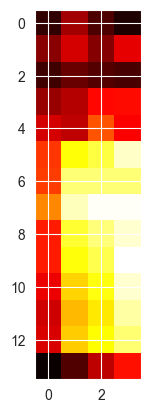

In [44]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_piv = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
print(df_scores_piv.round(5))
plt.imshow(df_scores_piv, cmap='hot')

In [45]:
# use decision tree with depth = 9 and samples leaf of 400
model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=400, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=400, random_state=1)

In [46]:
y_pred = tree.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6522761504877712

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.641803690305215

In [49]:
# inspect parameters: tree depths, number of estimators (takes a few minutes)
scores = []
for d in range(1, 15, 2):
    for n in range(10, 201, 20):
        model = RandomForestClassifier(n_estimators=n,
                                        max_depth=d,
                                        random_state=1)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

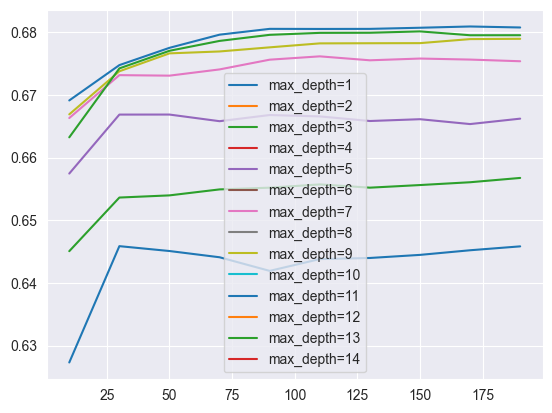

In [50]:
# plot auc of parameters
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in range(1, 15, 1):
    df_temp = df_scores[df_scores.max_depth == d]

    plt.plot(df_temp.n_estimators, df_temp.auc,
             label=f'max_depth={d}')

plt.legend()

In [55]:
# max depth of 11, 13 seem to be the best in a range of either 25-150 n estimators
# tune min sample leaf parameter (takes a few minutes)
scores = []
for d in [11, 13]:
    for s in [1, 3, 5, 7, 9]:
        for n in range(50, 201, 20):
            model = RandomForestClassifier(n_estimators=n,
                                        max_depth=d,
                                        min_samples_leaf=s,
                                        random_state=1)
            model.fit(X_train, y_train)

            y_pred = model.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_pred)

            scores.append((s, n, d, auc))

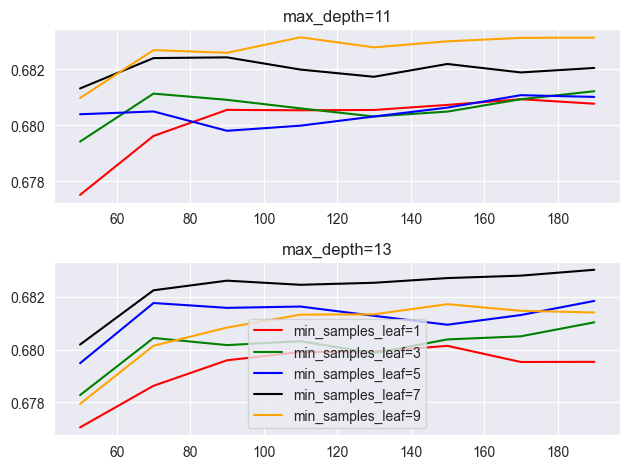

In [56]:
# plot auc of parameters
columns = ['min_samples_leaf', 'n_estimators', 'max_depth', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['red', 'green', 'blue', 'black', 'orange']
values = [1, 3, 5, 7, 9]

figs, ax = plt.subplots(2)

for s, col in zip(values, colors):
    d = 11
    df_temp = df_scores[(df_scores.min_samples_leaf == s) & (df_scores.max_depth == d)]
    ax[0].plot(df_temp.n_estimators, df_temp.auc,
                color=col,
                label=f'min_samples_leaf={s}')
    ax[0].set_title(f'max_depth={d}')

    d = 13
    df_temp = df_scores[(df_scores.min_samples_leaf == s) & (df_scores.max_depth == d)]
    ax[1].plot(df_temp.n_estimators, df_temp.auc,
                 color=col,
                 label=f'min_samples_leaf={s}')
    ax[1].set_title(f'max_depth={d}')

plt.legend()
figs.tight_layout()

In [57]:
# use depth of 11, min samples leafs of 9
# inspect parameters: n estimators
scores = []

n_estimators = range(100, 200, 5)

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n,
                                    max_depth=11,
                                    min_samples_leaf=9,
                                    random_state=1)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append(auc)

use n_estimators: 180
auc: 0.6834770396224656


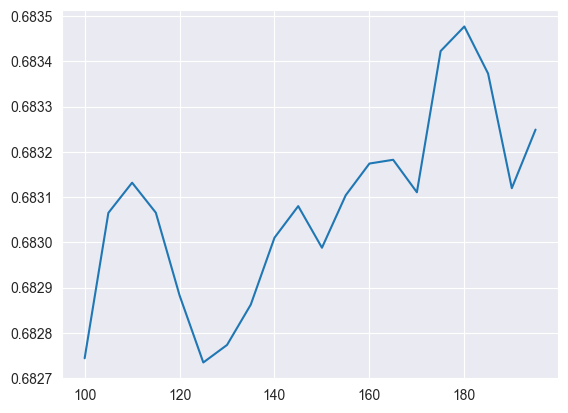

In [58]:
# plot parameters for n estimators
plt.plot(n_estimators, scores)
print(f'use n_estimators: {n_estimators[scores.index(max(scores))]}')
print(f'auc: {max(scores)}')

# XGBoost Gradient Boosting

In [5]:
import xgboost as xgb

In [60]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [61]:
#Default parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [62]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.6693492546396499

In [63]:
# watch performance with validations set
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [64]:
%%capture output
# capture the output of xgb as it's only printed and not stored

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [65]:
print(output.stdout)

[0]	train-auc:0.66301	val-auc:0.64868
[5]	train-auc:0.69670	val-auc:0.66805
[10]	train-auc:0.71828	val-auc:0.67107
[15]	train-auc:0.73208	val-auc:0.67481
[20]	train-auc:0.74805	val-auc:0.67608
[25]	train-auc:0.75825	val-auc:0.67517
[30]	train-auc:0.76799	val-auc:0.67441
[35]	train-auc:0.77681	val-auc:0.67246
[40]	train-auc:0.78645	val-auc:0.67188
[45]	train-auc:0.79144	val-auc:0.67037
[50]	train-auc:0.80097	val-auc:0.66842
[55]	train-auc:0.80869	val-auc:0.66561
[60]	train-auc:0.81594	val-auc:0.66386
[65]	train-auc:0.82365	val-auc:0.66036
[70]	train-auc:0.82937	val-auc:0.65975
[75]	train-auc:0.83551	val-auc:0.65713
[80]	train-auc:0.84093	val-auc:0.65620
[85]	train-auc:0.84484	val-auc:0.65425
[90]	train-auc:0.84909	val-auc:0.65392
[95]	train-auc:0.85330	val-auc:0.65213
[100]	train-auc:0.85681	val-auc:0.65232
[105]	train-auc:0.86065	val-auc:0.65107
[110]	train-auc:0.86477	val-auc:0.64900
[115]	train-auc:0.86837	val-auc:0.64668
[120]	train-auc:0.87153	val-auc:0.64587
[125]	train-auc:0.8751

In [66]:
# define function for saving the evaluation output in df
def parse_xgb_output(output):
    results = []

    # output string needs to be split into components of interes
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [67]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.66301,0.64868
1,5,0.69670,0.66805
2,10,0.71828,0.67107
3,15,0.73208,0.67481
4,20,0.74805,0.67608
5,25,0.75825,0.67517
6,30,0.76799,0.67441
7,35,0.77681,0.67246
8,40,0.78645,0.67188
9,45,0.79144,0.67037


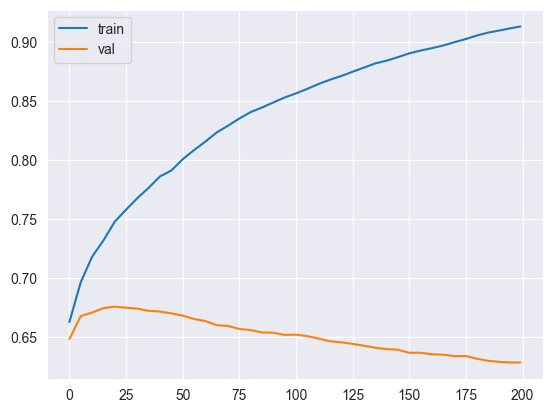

In [68]:
# performance in training and validation sets differ quite a bit
# check for overfitting in training set
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

,num_iter,train_auc,val_auc
4,20,0.74805,0.67608


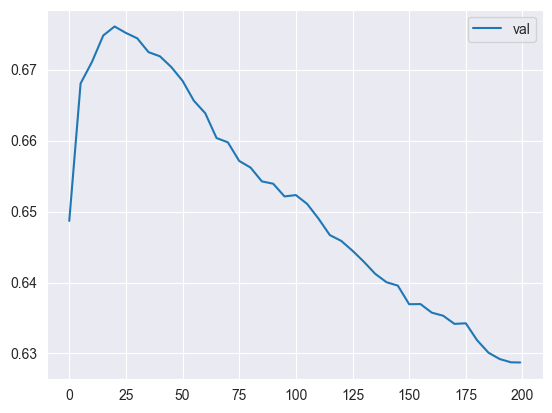

In [69]:
# check best performance in validation set to avoid overfitting
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
df_score[df_score.val_auc == df_score.val_auc.max()]

In [70]:
# parameter tuning: learning parameter eta
scores = {}
etas = [0.01, 0.05, 0.1, 0.3, 0.5, 1]

In [81]:
%%capture output
# evaluate for all etas

xgb_params['eta'] = etas[5]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [82]:
key = f'eta={etas[5]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=1


In [83]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5', 'eta=1'])

eta=0.01: AUC=0.67308
eta=0.05: AUC=0.68068
eta=0.1: AUC=0.67908
eta=0.3: AUC=0.67608
eta=0.5: AUC=0.67143
eta=1: AUC=0.65638


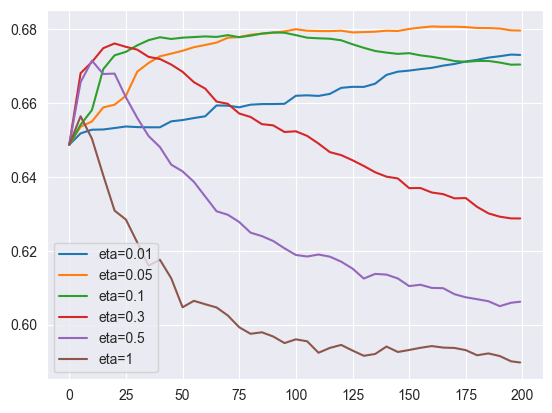

In [84]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    print(f'{key}: AUC={max(df_score.val_auc)}')
plt.legend()

In [85]:
# eta=0.05 but go beyond 75 iterations!
# tuning parameter depth
scores = {}
max_depths = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
xgb_params = {
    'eta': 0.05,
    'max_depth': 1,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [106]:
%%capture output
# evaluate for all params

xgb_params['max_depth'] = max_depths[10]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [107]:
key = f'max_depth={max_depths[10]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = max_depth=20


max_depth=1: AUC=0.65974
max_depth=2: AUC=0.66971
max_depth=4: AUC=0.6814
max_depth=6: AUC=0.68068
max_depth=8: AUC=0.6761
max_depth=10: AUC=0.66927
max_depth=12: AUC=0.66316
max_depth=14: AUC=0.66274
max_depth=16: AUC=0.66009
max_depth=18: AUC=0.65587
max_depth=20: AUC=0.65383


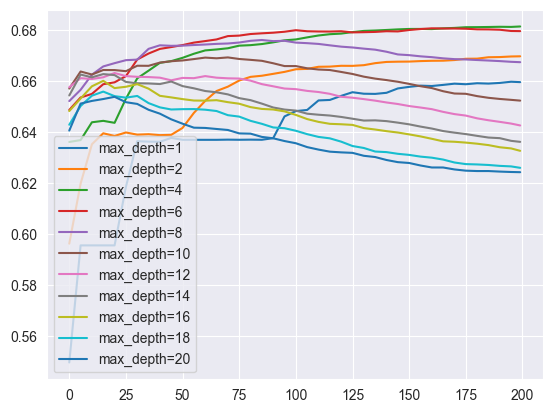

In [108]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    print(f'{key}: AUC={max(df_score.val_auc)}')
plt.legend()

In [109]:
# max_depths of 6 most consistently highest auc
# tune parameter min_child_weight
scores = {}
child_weights = [1, 2, 4, 5, 10, 15, 20, 25, 30, 35, 40]
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [131]:
%%capture output
# evaluate for all params

xgb_params['min_child_weight'] = child_weights[10]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [132]:
key = f'min_child_weight={child_weights[10]}'
scores[key] = parse_xgb_output(output)
print(f'key = {key}')

key = min_child_weight=40


min_child_weight=1: AUC=0.68068
min_child_weight=2: AUC=0.67941
min_child_weight=4: AUC=0.68092
min_child_weight=5: AUC=0.68013
min_child_weight=10: AUC=0.6813
min_child_weight=15: AUC=0.6812
min_child_weight=20: AUC=0.68312
min_child_weight=25: AUC=0.68179
min_child_weight=30: AUC=0.68211
min_child_weight=35: AUC=0.68485
min_child_weight=40: AUC=0.68288


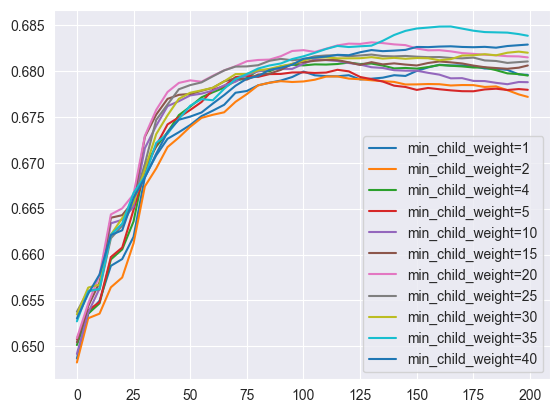

In [133]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    print(f'{key}: AUC={max(df_score.val_auc)}')
plt.legend()

In [72]:
# min_child_weight = 35

# Final Model
## AUC comparison:
- Logistic Regression: 0.501
- Decision Tree: 0.652
- Random Forest: 0.683
- XGBoost: 0.685

In [134]:
# Train the best model (XGBoost) on the full training dataset

# prepare full train data
df_full_train = df_full_train.reset_index(drop=True)
# change y to numerical for training
df_full_train.severe_accident.replace(['yes', 'no'], [1, 0], inplace=True)
# assign y data to be predicted
y_full_train = df_full_train.severe_accident.values
# remove y from data
del df_full_train['severe_accident']

In [135]:
dv = DictVectorizer(sparse = False)

full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

features = dv.get_feature_names_out()
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [136]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 35,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=150)
y_pred = model.predict(dtest)
print('Final Gradient Boosting Model:')
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred).round(5)}')

Final Gradient Boosting Model:
ROC AUC score: 0.6858


# Save Model

In [2]:
import pickle

In [138]:
output_file = 'model.bin'

In [139]:
with open(output_file,'wb') as f_out:
    pickle.dump((dv, model), f_out)

# Use the Model

In [4]:
input_file = 'model.bin'

with open(input_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [85]:
road_user = {
    'district': 'tempelhof-schoeneberg', #'mitte' 'marzahn-hellersdorf'
    'bike_involved': 1,
    'street_condition': 'ice_snow', # 'wet' 'dry'
    'day': 'wednesday', #'sunday' 'monday' 'friday'
    'month': 'december',
    'hour': 22,
    'light_condition': 'dark' # 'light' 'dusk_dawn'
}

In [86]:
X = dv.transform([road_user])

In [87]:
temp_test = xgb.DMatrix(X, feature_names = dv.get_feature_names_out())
y_pred = model.predict(temp_test)

In [88]:
print(f'In case of an accident, the probability of severe injuries is {y_pred[0]:.2f}')

In case of an accident, the probability of severe injuries is 0.32


### The district makes the largest difference in predictions for severity of accidents

### Next step: include an overview map of districts for predictions